Data Dictionary (column description)

Gender: Gender of the student (male/female)

EthnicGroup: Ethnic group of the student (group A to E)

ParentEduc: Parent(s) education background (from some_highschool to master's degree)

LunchType: School lunch type (standard or free/reduced)

TestPrep: Test preparation course followed (completed or none)

ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)

PracticeSport: How often the student parctice sport (never/sometimes/regularly))

IsFirstChild: If the child is first child in the family or not (yes/no)

NrSiblings: Number of siblings the student has (0 to 7)

TransportMeans: Means of transport to school (schoolbus/private)

WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)

MathScore: math test score(0-100)

ReadingScore: reading test score(0-100)

WritingScore: writing test score(0-100)

Analytics questions:

What factors (features) affect test scores most?

Are there interacting features which affect test scores?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Expanded_data_with_more_features.csv")

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
df.shape

(30641, 15)

As the no. of null values is very less in comparison to our original dataset.

So, we will simply drop the rows with null values.

In [9]:
# This will drop rows with null values in any column
df.dropna(inplace=True)

In [10]:
#again checking:
df.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [11]:
#removing all the unnecessary columns:
# axis=1 specifies that we want to drop a column (axis=0 is for dropping rows)
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


In [13]:
#converting  no. of siblings column(float type) to int type
df['NrSiblings'] = df['NrSiblings'].astype(int)

In [14]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43,39


#remove outliers:

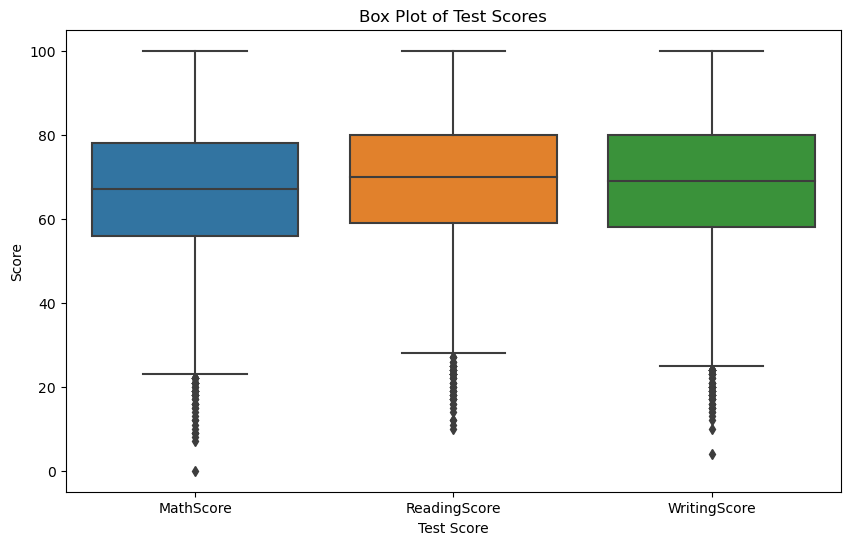

In [15]:
# Combine MathScore, ReadingScore, and WritingScore into a single DataFrame
scores_df = pd.melt(df[['MathScore', 'ReadingScore', 'WritingScore']], var_name='TestScore', value_name='Score')

# Create box plot for all three test scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=scores_df, x='TestScore', y='Score')
plt.xlabel('Test Score')
plt.ylabel('Score')
plt.title('Box Plot of Test Scores')
plt.show()


In [16]:
# To remove outliers from the MathScore, ReadingScore, and WritingScore columns, you can use statistical methods such
# as Z-score or IQR (Interquartile Range) method. Here's how you can do it using the IQR method:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['MathScore'].quantile(0.25)
Q3 = df['MathScore'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from MathScore column
df = df[(df['MathScore'] >= lower_bound) & (df['MathScore'] <= upper_bound)]

In [17]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['ReadingScore'].quantile(0.25)
Q3 = df['ReadingScore'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from MathScore column
df = df[(df['ReadingScore'] >= lower_bound) & (df['ReadingScore'] <= upper_bound)]

In [18]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['WritingScore'].quantile(0.25)
Q3 = df['WritingScore'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from WritingScore column
df = df[(df['WritingScore'] >= lower_bound) & (df['WritingScore'] <= upper_bound)]

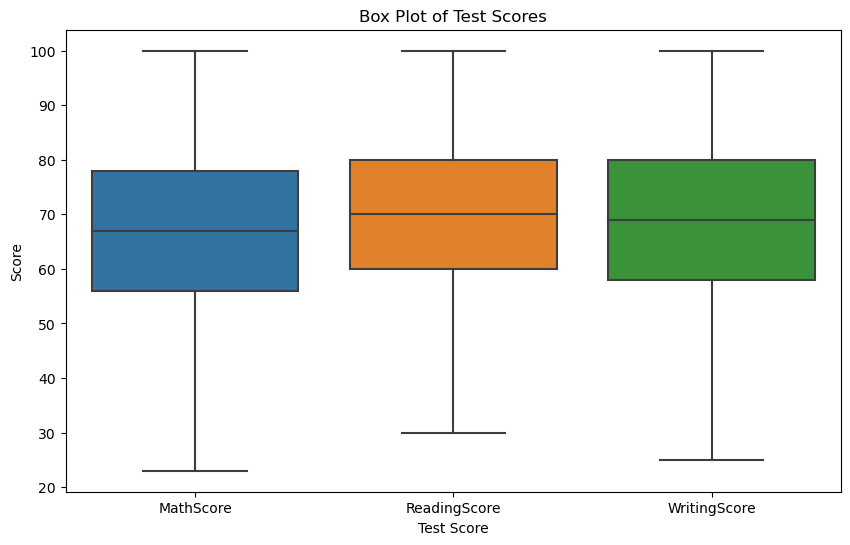

In [19]:
#checking if outliers is removed or not:

# Combine MathScore, ReadingScore, and WritingScore into a single DataFrame
scores_df = pd.melt(df[['MathScore', 'ReadingScore', 'WritingScore']], var_name='TestScore', value_name='Score')

# Create box plot for all three test scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=scores_df, x='TestScore', y='Score')
plt.xlabel('Test Score')
plt.ylabel('Score')
plt.title('Box Plot of Test Scores')
plt.show()


# **Plotting Ghraphs:**

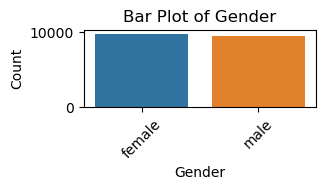

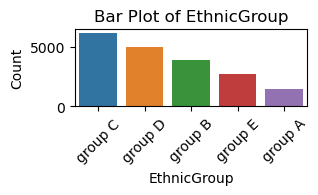

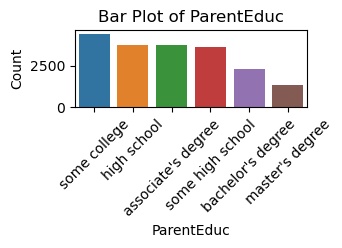

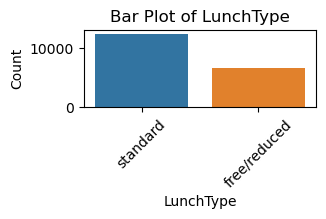

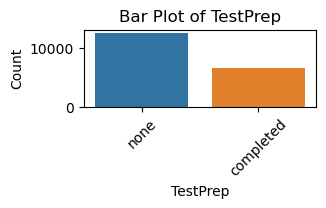

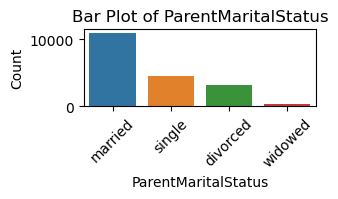

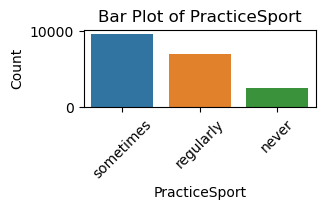

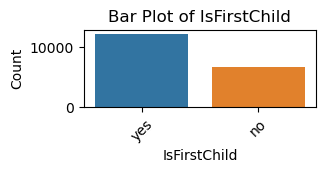

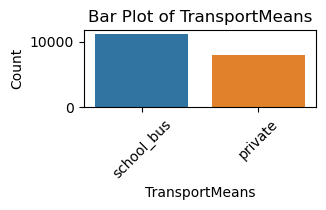

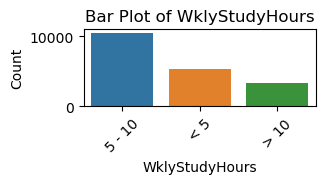

In [20]:
# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column datatype is object (categorical)
    if df[column].dtype == 'object':
        # Count the frequency of each unique value in the column
        value_counts = df[column].value_counts()

        # Create a bar plot using seaborn
        plt.figure(figsize=(3, 1))  # Adjust figure size as needed
        sns.barplot(x=value_counts.index, y=value_counts.values)

        # Add labels and title
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Bar Plot of {column}')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

        # Show plot
        plt.show()


In [21]:
df["WklyStudyHours"].value_counts()

5 - 10    10441
< 5        5344
> 10       3344
Name: WklyStudyHours, dtype: int64

In [22]:
#checking the count of no. of males and females:
df["Gender"].value_counts()

female    9738
male      9391
Name: Gender, dtype: int64

In [23]:
df["WklyStudyHours"].value_counts()

5 - 10    10441
< 5        5344
> 10       3344
Name: WklyStudyHours, dtype: int64

In [24]:
df.shape

(19129, 14)

Conclusions:

1. The count of no. of males is more than the no. of feamles.

2.mostly students belongs to Group C ethnic group

3. very less students are having parents with higher education.

4. More of the students are getting high standrd food.

5.very less students are doing test preparations.

6. Most of the students' parents is married.

7.Students are actively participating in sports.

8. being first child doesnt make an impact on student performance.

9. mostly students are using school bus.

10. 10k students out of 19k are studying for 5 to 10 hours weekly.


In [25]:

# now lets check how these factors are affecting student performance:


Here are some questions you can consider for each feature to explore how they may affect students' test scores:

**Gender**

Do males tend to score higher than females on tests, or vice versa?

Is there a significant difference in test scores between male and female students?

**Ethnic Group:**

Are there variations in test scores among different ethnic groups?

**Parent's Education:**

Do students with parents holding higher degrees tend to perform better academically?

**Lunch Type:**

Are there differences in test scores between students receiving standard lunch and those receiving free/reduced lunch?

**Test Preparation:**

Do students who complete test preparation courses perform better on tests compared to those who don't?

Is there a correlation between test preparation and improved test scores?

**Parent's Marital Status:**

Does the marital status of parents influence students' academic performance?

Are students with married parents more likely to achieve higher test scores?

**Practice Sport:**

Does participation in sports impact students' test scores positively or negatively?

Are students who regularly participate in sports more likely to excel academically?

**Is First Child:**

Does being the first child in the family affect academic performance?

Are first-born children more or less likely to achieve higher test scores compared to non-first-born children?

**Transport Means:**

Does the mode of transportation to school have any effect on students' test scores?

Are students using the school bus more or less likely to perform well on tests compared to those using private transport?

**Weekly Study Hours:**

Is there a correlation between the number of weekly study hours and test scores?

Do students who study more hours per week tend to achieve higher test scores?

In [26]:
df.head(2)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,5 - 10,76,78,75


# **Q.1> Do males tend to score higher than females on tests, or vice versa?**

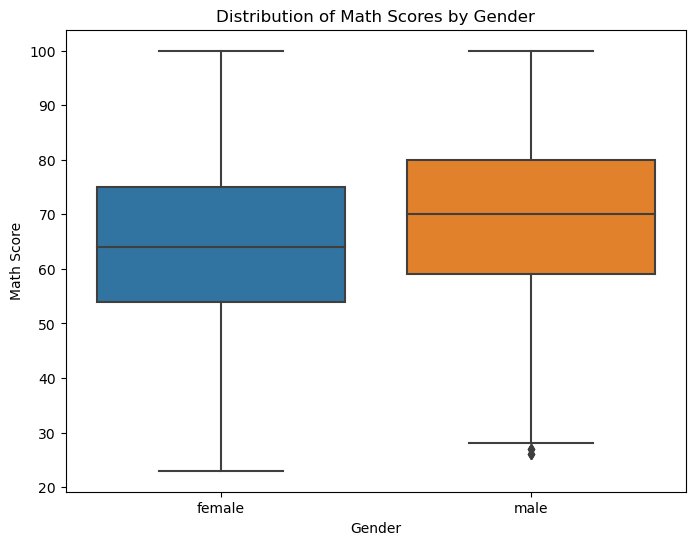

In [27]:
# Do males tend to score higher than females on tests, or vice versa?

# To plot a graph to explore whether males tend to score higher than females on tests,
# or vice versa, you can create a box plot or a violin plot to visualize the distribution of test scores for each gender.

# Create a box plot to compare test scores between males and females

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='MathScore', data=df)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Distribution of Math Scores by Gender')

# Show plot
plt.show()

# **Ans1: it is clear from the chart that males are scoring higher than females**

# **Q.2: Is there a significant difference in test scores between male and female students?**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


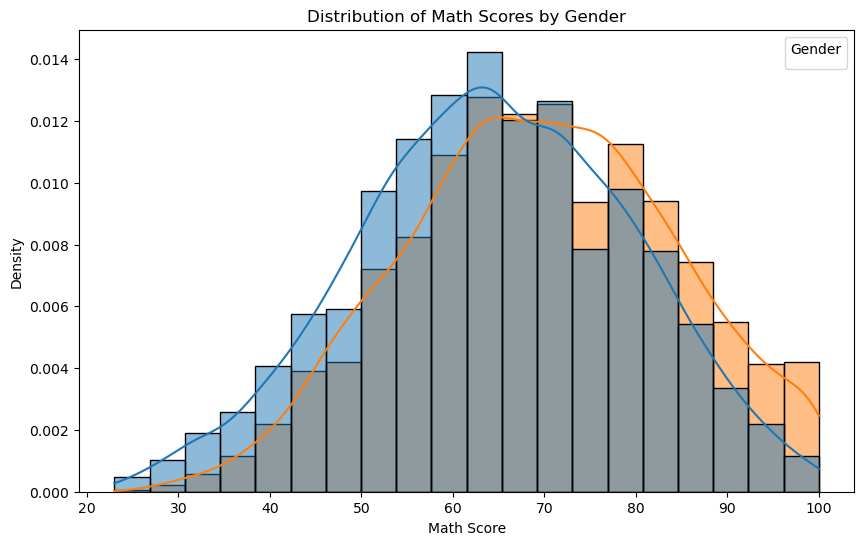

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Replace 'MathScore' with the actual name of the column containing test scores
# Replace 'Gender' with the actual name of the column containing gender information

# Create overlapping histograms or density plots for male and female test scores
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(data=df, x='MathScore', hue='Gender', kde=True, stat='density', bins=20, alpha=0.5)

# Add labels and title
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.title('Distribution of Math Scores by Gender')

# Show legend
plt.legend(title='Gender')

# Show plot
plt.show()


In [29]:
# To check if there is a significant difference in test scores between male and female students,
# you can use statistical hypothesis testing. One commonly used test for comparing the means of
# two independent samples is the independent samples t-test.
# Here's how you can perform this test in Python using the scipy.stats module:

from scipy import stats

# Assuming df is your DataFrame containing the dataset
# Replace 'MathScore' with the actual name of the column containing test scores
# Replace 'Gender' with the actual name of the column containing gender information

# Extract test scores for male and female students
male_scores = df[df['Gender'] == 'male']['MathScore']
female_scores = df[df['Gender'] == 'female']['MathScore']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(male_scores, female_scores)

# Print the results
print("Independent samples t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a significant difference in test scores between male and female students.")
else:
    print("There is no significant difference in test scores between male and female students.")


Independent samples t-test results:
t-statistic: 23.24394352043398
p-value: 7.027249976445982e-118
There is a significant difference in test scores between male and female students.


# **Ans: There is a significant difference in test scores between male and female students.**

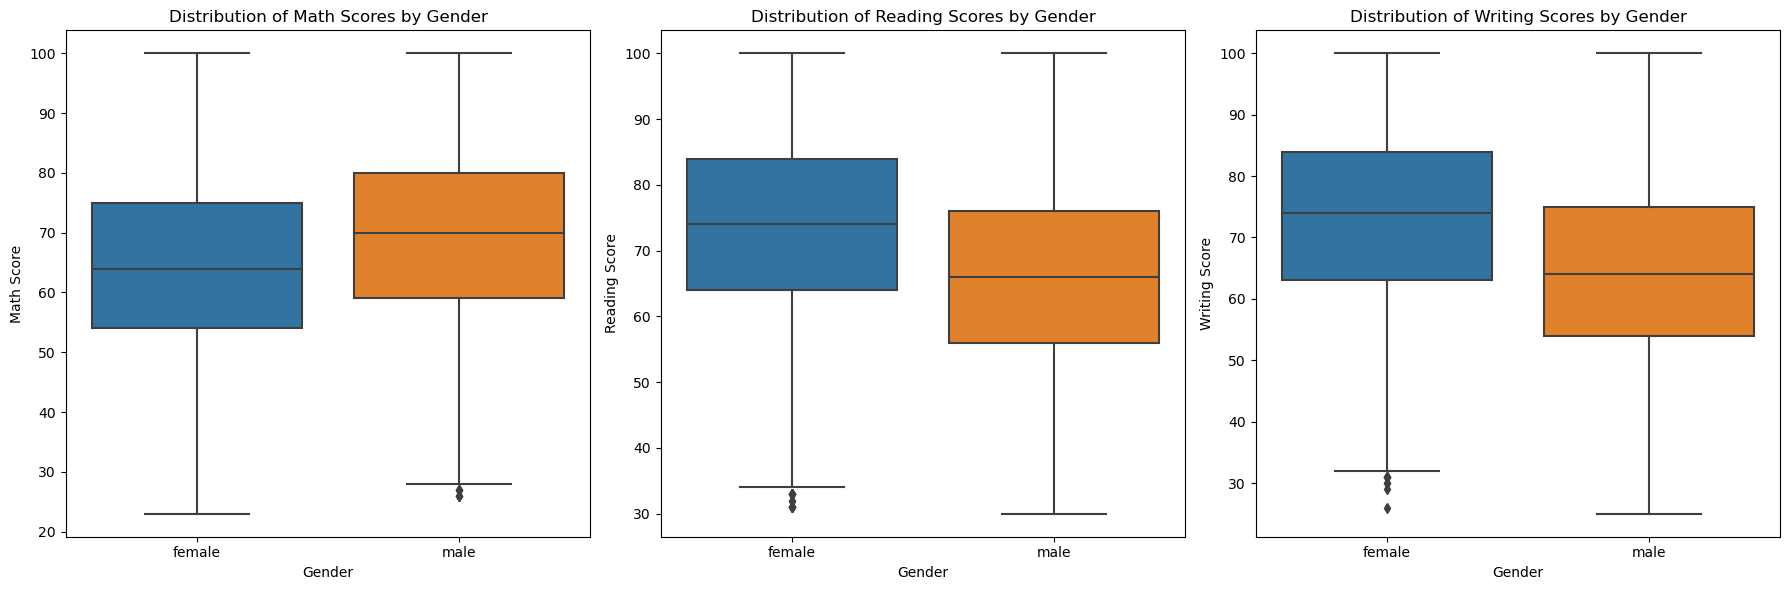

In [30]:
# Create box plots to compare test scores between males and females
plt.figure(figsize=(18, 6))  # Adjust figure size as needed

# Math Score
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='MathScore', data=df)
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Distribution of Math Scores by Gender')

# Reading Score
plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='ReadingScore', data=df)
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.title('Distribution of Reading Scores by Gender')

# Writing Score
plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='WritingScore', data=df)
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.title('Distribution of Writing Scores by Gender')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



# **Females are scoring more in reading and writing, while males are scoring more in maths.**

# **Q.3:Are there variations in test scores among different ethnic groups?**

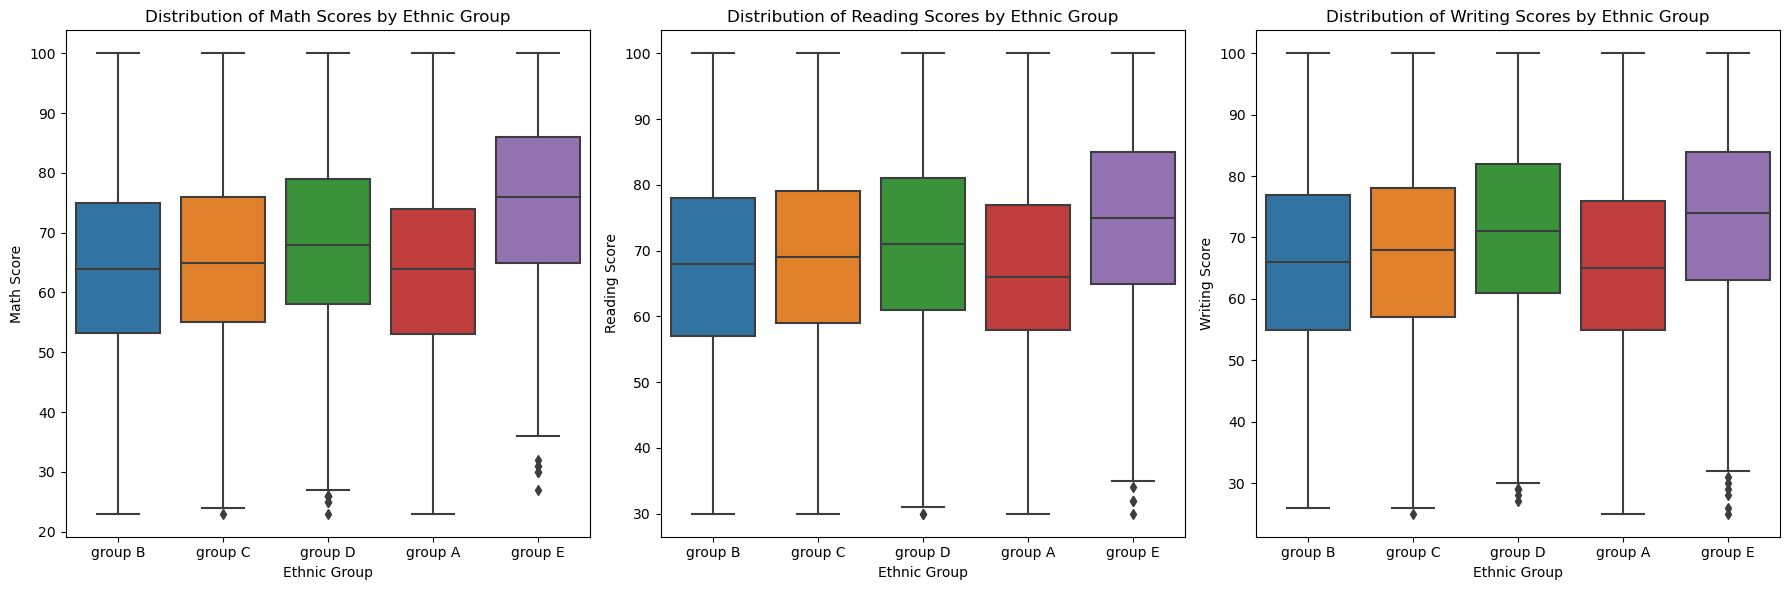

In [31]:
# Create box plots to compare test scores among different ethnic groups
plt.figure(figsize=(18, 6))  # Adjust figure size as needed

# Math Score
plt.subplot(1, 3, 1)
sns.boxplot(x='EthnicGroup', y='MathScore', data=df)
plt.xlabel('Ethnic Group')
plt.ylabel('Math Score')
plt.title('Distribution of Math Scores by Ethnic Group')

# Reading Score
plt.subplot(1, 3, 2)
sns.boxplot(x='EthnicGroup', y='ReadingScore', data=df)
plt.xlabel('Ethnic Group')
plt.ylabel('Reading Score')
plt.title('Distribution of Reading Scores by Ethnic Group')

# Writing Score
plt.subplot(1, 3, 3)
sns.boxplot(x='EthnicGroup', y='WritingScore', data=df)
plt.xlabel('Ethnic Group')
plt.ylabel('Writing Score')
plt.title('Distribution of Writing Scores by Ethnic Group')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# **Ans: we can see group E is performing best in all the subjects.**

# **Q.4: Do students with parents holding higher degrees tend to perform better academically?**

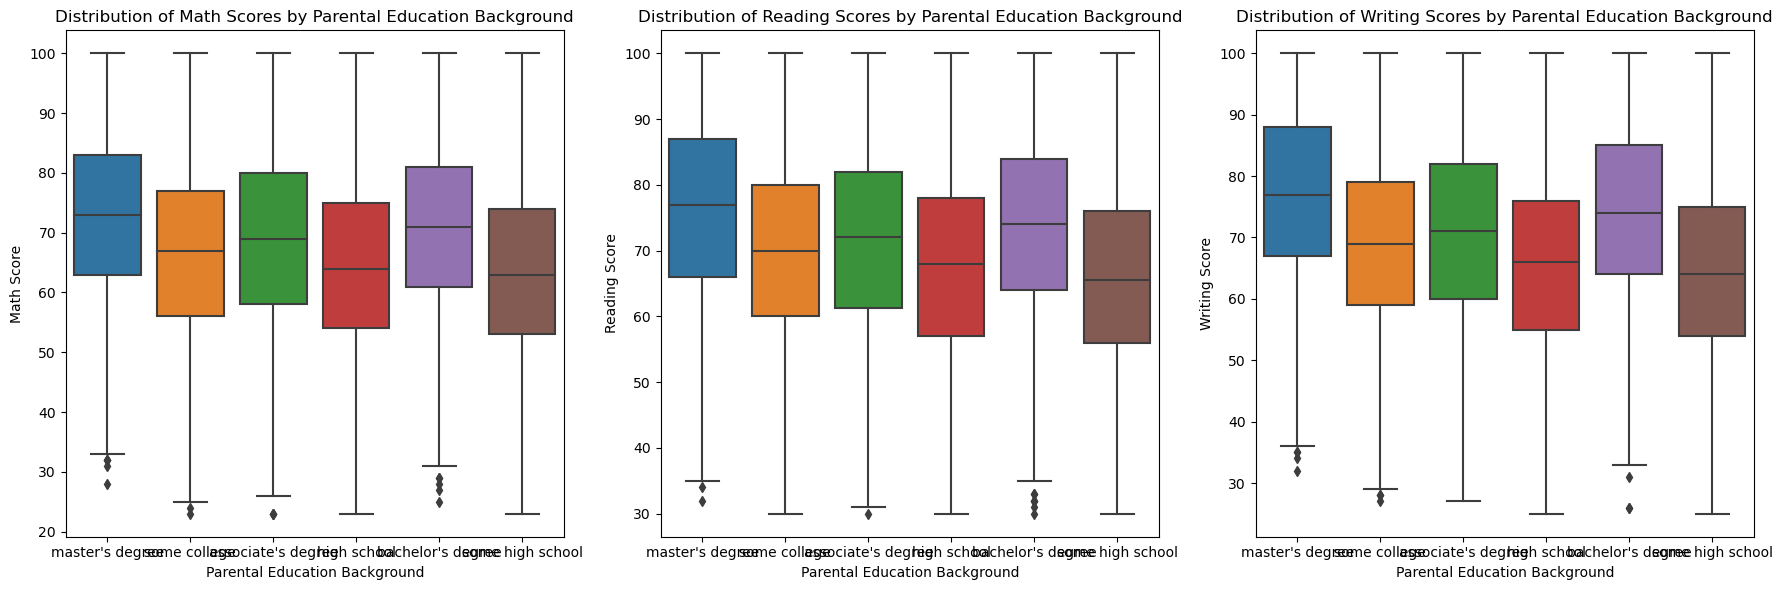

In [32]:

# Create subplots for Math, Reading, and Writing scores
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Math Score
sns.boxplot(ax=axes[0], x='ParentEduc', y='MathScore', data=df)
axes[0].set_xlabel('Parental Education Background')
axes[0].set_ylabel('Math Score')
axes[0].set_title('Distribution of Math Scores by Parental Education Background')

# Reading Score
sns.boxplot(ax=axes[1], x='ParentEduc', y='ReadingScore', data=df)
axes[1].set_xlabel('Parental Education Background')
axes[1].set_ylabel('Reading Score')
axes[1].set_title('Distribution of Reading Scores by Parental Education Background')

# Writing Score
sns.boxplot(ax=axes[2], x='ParentEduc', y='WritingScore', data=df)
axes[2].set_xlabel('Parental Education Background')
axes[2].set_ylabel('Writing Score')
axes[2].set_title('Distribution of Writing Scores by Parental Education Background')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# **Ans: Students with parents having higher education are performing better than other students.**

# **Q.5: Are there differences in test scores between students receiving standard lunch and those receiving free/reduced lunch?**

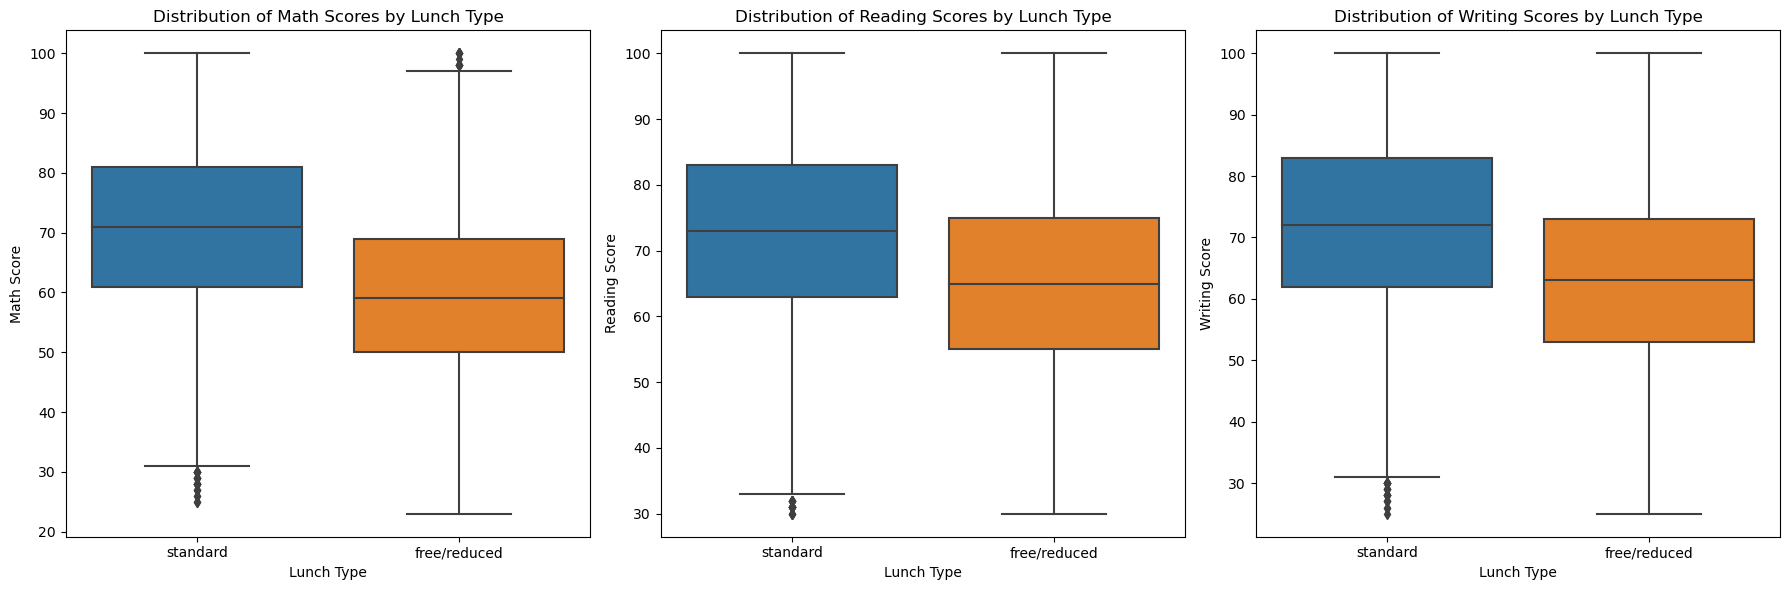

In [33]:
# Create subplots for Math, Reading, and Writing scores
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Math Score
sns.boxplot(ax=axes[0], x='LunchType', y='MathScore', data=df)
axes[0].set_xlabel('Lunch Type')
axes[0].set_ylabel('Math Score')
axes[0].set_title('Distribution of Math Scores by Lunch Type')

# Reading Score
sns.boxplot(ax=axes[1], x='LunchType', y='ReadingScore', data=df)
axes[1].set_xlabel('Lunch Type')
axes[1].set_ylabel('Reading Score')
axes[1].set_title('Distribution of Reading Scores by Lunch Type')

# Writing Score
sns.boxplot(ax=axes[2], x='LunchType', y='WritingScore', data=df)
axes[2].set_xlabel('Lunch Type')
axes[2].set_ylabel('Writing Score')
axes[2].set_title('Distribution of Writing Scores by Lunch Type')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



# **Ans: Students with standrd lunch are performing better than students with free lunch**

# **Q.6: Do students who complete test preparation courses perform better on tests compared to those who don't?**



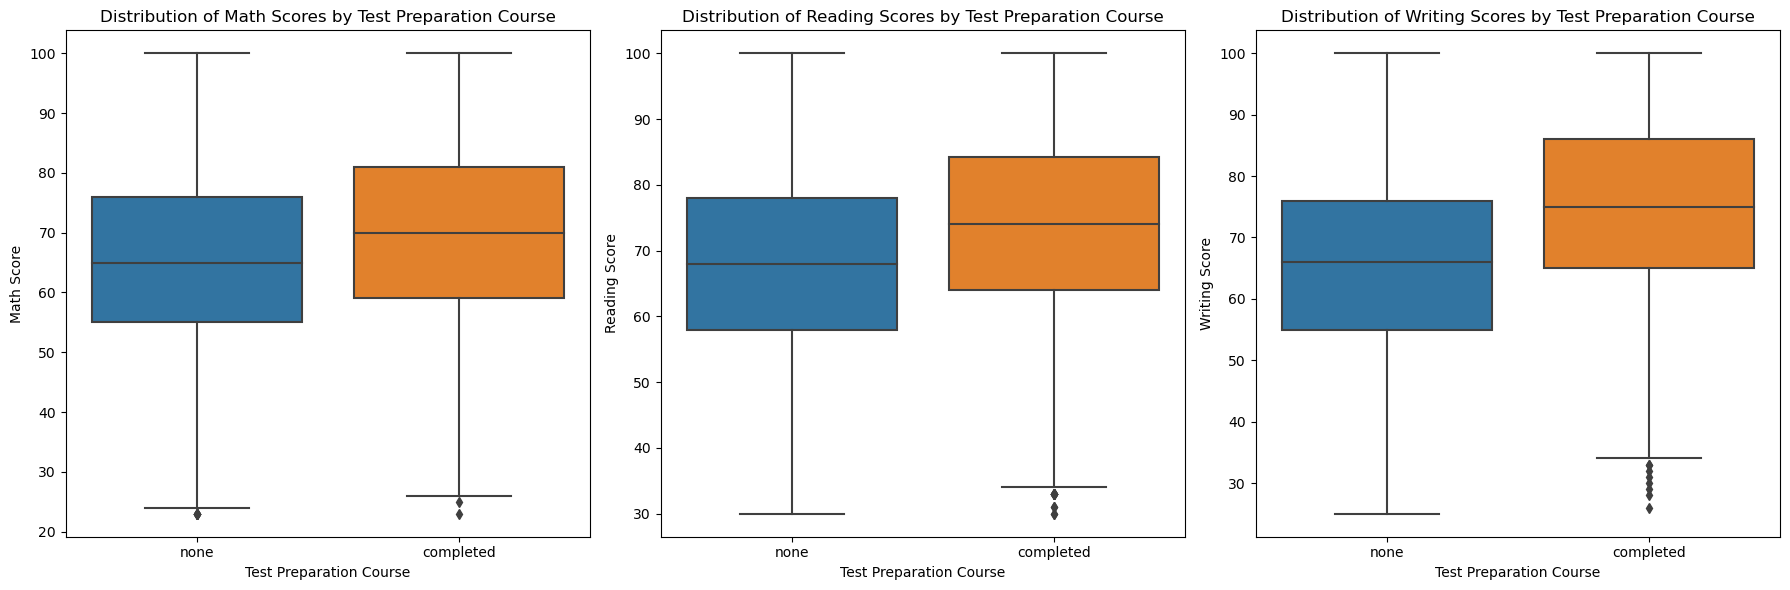

In [34]:
# Create subplots for Math, Reading, and Writing scores
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Math Score
sns.boxplot(ax=axes[0], x='TestPrep', y='MathScore', data=df)
axes[0].set_xlabel('Test Preparation Course')
axes[0].set_ylabel('Math Score')
axes[0].set_title('Distribution of Math Scores by Test Preparation Course')

# Reading Score
sns.boxplot(ax=axes[1], x='TestPrep', y='ReadingScore', data=df)
axes[1].set_xlabel('Test Preparation Course')
axes[1].set_ylabel('Reading Score')
axes[1].set_title('Distribution of Reading Scores by Test Preparation Course')

# Writing Score
sns.boxplot(ax=axes[2], x='TestPrep', y='WritingScore', data=df)
axes[2].set_xlabel('Test Preparation Course')
axes[2].set_ylabel('Writing Score')
axes[2].set_title('Distribution of Writing Scores by Test Preparation Course')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# **Ans: Students who have completed their Test Preparation course are scoring more than other students who have not completed it.**

# **Q.7:Is there a correlation between test preparation and improved test scores?**

In [35]:
#to find a correlation we need to convert TestPrep to int type:
# Map categorical values to numerical values
test_prep_mapping = {'none': 0, 'completed': 1}
df['TestPrep'] = df['TestPrep'].map(test_prep_mapping)

# Convert 'TestPrep' column to integer type
df['TestPrep'] = df['TestPrep'].astype(int)

# Now 'TestPrep' column contains numerical values (0 for 'none', 1 for 'completed')


In [36]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,0,single,sometimes,yes,4,school_bus,< 5,87,93,91
4,male,group C,some college,standard,0,married,sometimes,yes,0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,0,married,regularly,yes,1,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,1,widowed,never,no,1,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,0,married,sometimes,yes,1,private,> 10,41,43,39


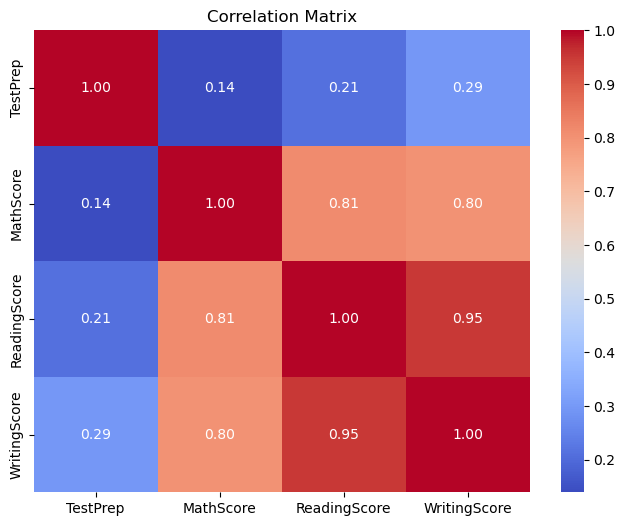

In [37]:
# Calculate correlation matrix
corr_matrix = df[['TestPrep', 'MathScore', 'ReadingScore', 'WritingScore']].corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [38]:
# Calculate correlation matrix using pandas
corr_matrix = df[['TestPrep', 'MathScore', 'ReadingScore', 'WritingScore']].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
              TestPrep  MathScore  ReadingScore  WritingScore
TestPrep      1.000000   0.139455      0.210923      0.294109
MathScore     0.139455   1.000000      0.811758      0.800629
ReadingScore  0.210923   0.811758      1.000000      0.950431
WritingScore  0.294109   0.800629      0.950431      1.000000


From the correlation matrix:

1. **Test Preparation and Test Scores**:
    - There is a weak positive correlation between completing test preparation courses ('TestPrep') and test scores in Math, Reading, and Writing (correlation coefficients range from approximately 0.14 to 0.29).
    - This suggests that there is a slight tendency for students who completed test preparation courses to have higher test scores, but the correlation is not strong.

2. **Test Scores Correlation**:
    - There are strong positive correlations between Math, Reading, and Writing scores.
    - Math scores have a strong positive correlation with Reading scores (correlation coefficient of approximately 0.82) and Writing scores (correlation coefficient of approximately 0.81).
    - Similarly, Reading scores have a strong positive correlation with Writing scores (correlation coefficient of approximately 0.95).

3. **Conclusions**:
    - Completing test preparation courses may have a slight positive influence on test scores, but other factors may also play a significant role.
    - There is a strong positive correlation between Math, Reading, and Writing scores, suggesting that students who perform well in one subject tend to perform well in the others.
    - While completing test preparation courses may be beneficial, focusing on improving overall academic skills across subjects may have a more significant impact on test scores.

# **Q.8: Does the marital status of parents influence students' academic performance?**

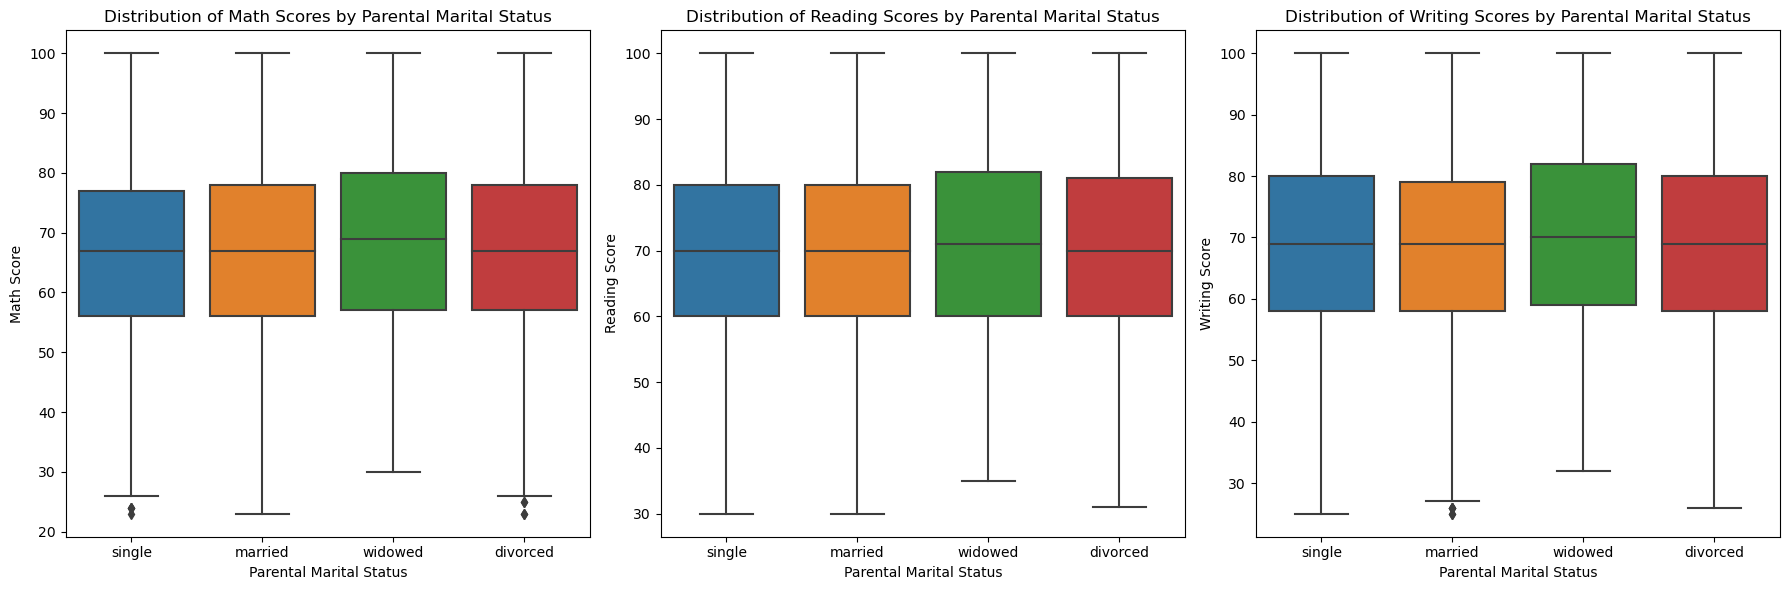

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Replace 'ParentMaritalStatus' with the actual name of the column containing parental marital status information
# Replace 'MathScore', 'ReadingScore', and 'WritingScore' with the actual names of the columns containing test scores

# Create subplots for Math, Reading, and Writing scores
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Math Score
sns.boxplot(ax=axes[0], x='ParentMaritalStatus', y='MathScore', data=df)
axes[0].set_xlabel('Parental Marital Status')
axes[0].set_ylabel('Math Score')
axes[0].set_title('Distribution of Math Scores by Parental Marital Status')

# Reading Score
sns.boxplot(ax=axes[1], x='ParentMaritalStatus', y='ReadingScore', data=df)
axes[1].set_xlabel('Parental Marital Status')
axes[1].set_ylabel('Reading Score')
axes[1].set_title('Distribution of Reading Scores by Parental Marital Status')

# Writing Score
sns.boxplot(ax=axes[2], x='ParentMaritalStatus', y='WritingScore', data=df)
axes[2].set_xlabel('Parental Marital Status')
axes[2].set_ylabel('Writing Score')
axes[2].set_title('Distribution of Writing Scores by Parental Marital Status')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# **Ans: It is clear from the graphs marital status of students does not affect student performance.**

# **Q.9: Are students with married parents more likely to achieve higher test scores?**

# **Ans:It is clear from the graphs marital status of students does not affect student performance.**

# **Q.10: Does participation in sports impact students' test scores positively or negatively?**
# **or**
# **Are students who regularly participate in sports more likely to excel academically?**


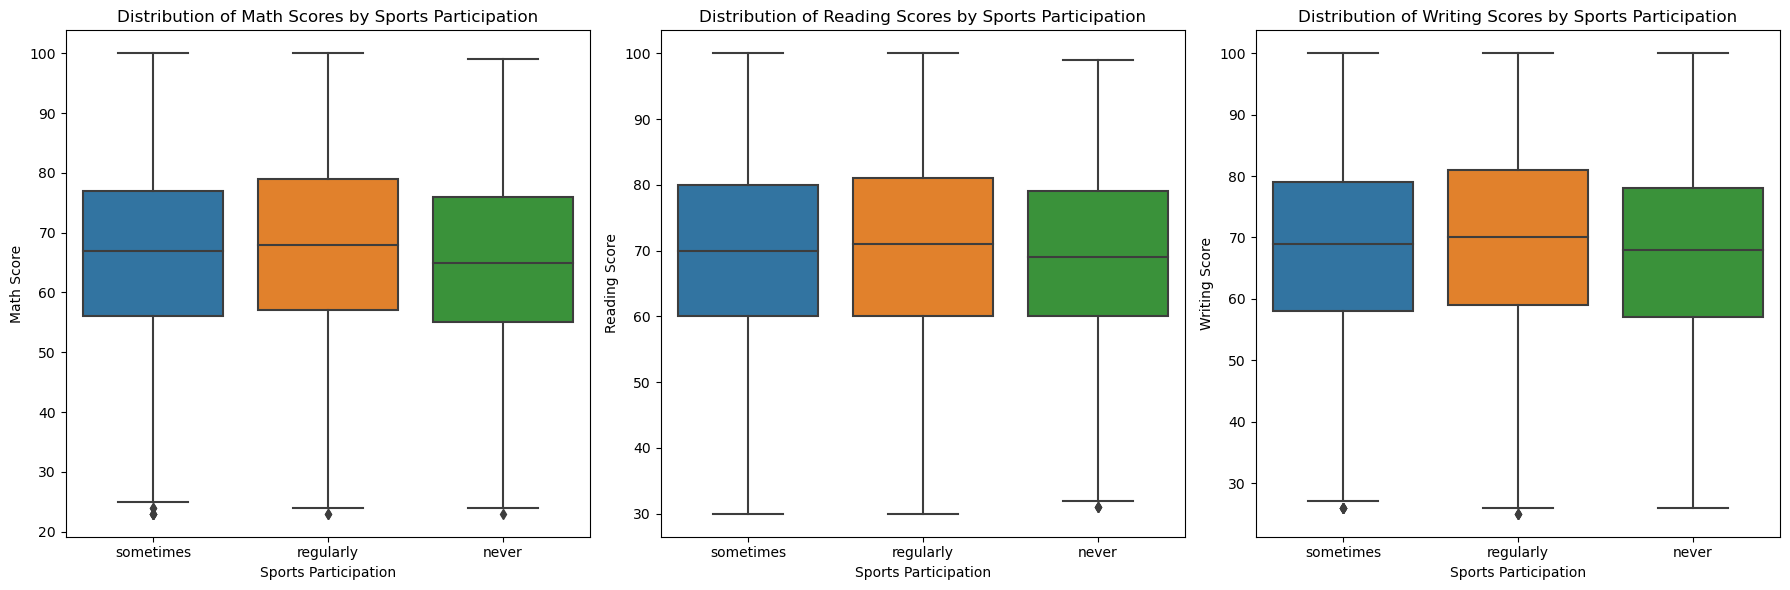

In [40]:

# Create subplots for Math, Reading, and Writing scores
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Math Score
sns.boxplot(ax=axes[0], x='PracticeSport', y='MathScore', data=df)
axes[0].set_xlabel('Sports Participation')
axes[0].set_ylabel('Math Score')
axes[0].set_title('Distribution of Math Scores by Sports Participation')

# Reading Score
sns.boxplot(ax=axes[1], x='PracticeSport', y='ReadingScore', data=df)
axes[1].set_xlabel('Sports Participation')
axes[1].set_ylabel('Reading Score')
axes[1].set_title('Distribution of Reading Scores by Sports Participation')

# Writing Score
sns.boxplot(ax=axes[2], x='PracticeSport', y='WritingScore', data=df)
axes[2].set_xlabel('Sports Participation')
axes[2].set_ylabel('Writing Score')
axes[2].set_title('Distribution of Writing Scores by Sports Participation')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# **Ans: Students who engage in regular sports participation tend to achieve higher scores compared to those who participate in sports occasionally or not at all.**

# **Q.11: Does being the first child in the family affect academic performance?**

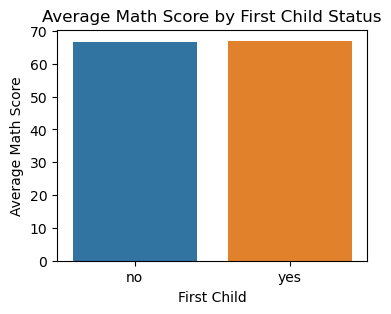

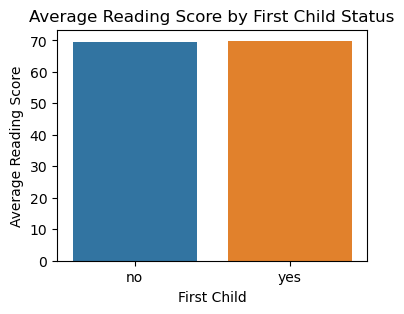

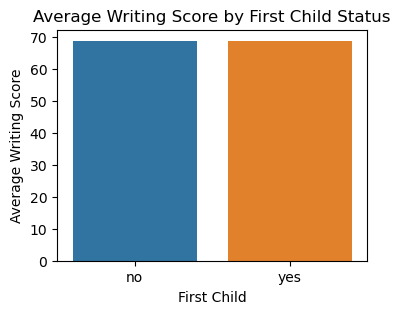

In [41]:
# Calculate the average test scores for each category of being the first child
avg_scores = df.groupby('IsFirstChild')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()

# Create bar plot for Math Score
plt.figure(figsize=(4, 3))
sns.barplot(x='IsFirstChild', y='MathScore', data=avg_scores)
plt.xlabel('First Child')
plt.ylabel('Average Math Score')
plt.title('Average Math Score by First Child Status')
plt.show()

# Create bar plot for Reading Score
plt.figure(figsize=(4, 3))
sns.barplot(x='IsFirstChild', y='ReadingScore', data=avg_scores)
plt.xlabel('First Child')
plt.ylabel('Average Reading Score')
plt.title('Average Reading Score by First Child Status')
plt.show()

# Create bar plot for Writing Score
plt.figure(figsize=(4, 3))
sns.barplot(x='IsFirstChild', y='WritingScore', data=avg_scores)
plt.xlabel('First Child')
plt.ylabel('Average Writing Score')
plt.title('Average Writing Score by First Child Status')
plt.show()


# **Ans: Being a first child or last child does affect the test score of a student**

# **Q.12: Are students using the school bus more or less likely to perform well on tests compared to those using private transport?**

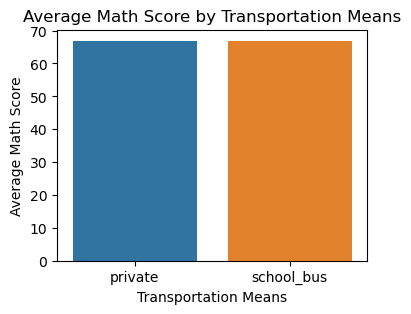

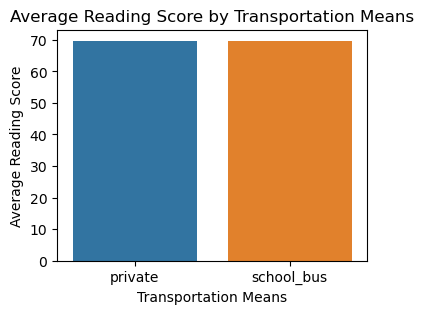

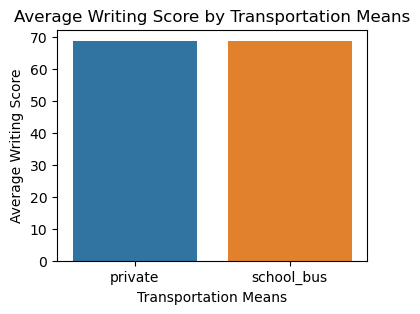

In [42]:
# Calculate the average test scores for each mode of transportation
avg_scores = df.groupby('TransportMeans')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()

# Create bar plot for Math Score
plt.figure(figsize=(4, 3))
sns.barplot(x='TransportMeans', y='MathScore', data=avg_scores)
plt.xlabel('Transportation Means')
plt.ylabel('Average Math Score')
plt.title('Average Math Score by Transportation Means')
plt.show()

# Create bar plot for Reading Score
plt.figure(figsize=(4, 3))
sns.barplot(x='TransportMeans', y='ReadingScore', data=avg_scores)
plt.xlabel('Transportation Means')
plt.ylabel('Average Reading Score')
plt.title('Average Reading Score by Transportation Means')
plt.show()

# Create bar plot for Writing Score
plt.figure(figsize=(4, 3))
sns.barplot(x='TransportMeans', y='WritingScore', data=avg_scores)
plt.xlabel('Transportation Means')
plt.ylabel('Average Writing Score')
plt.title('Average Writing Score by Transportation Means')
plt.show()


# **Q.13: Do students who study more hours per week tend to achieve higher test scores?**

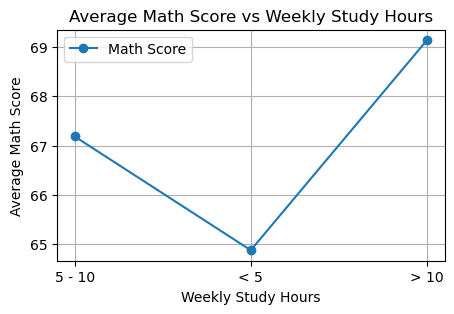

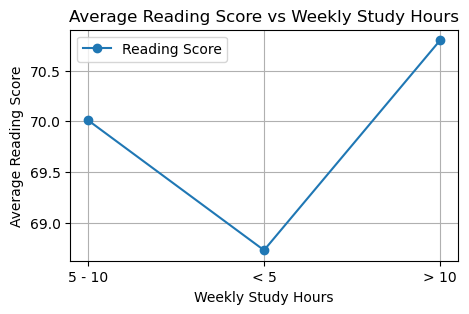

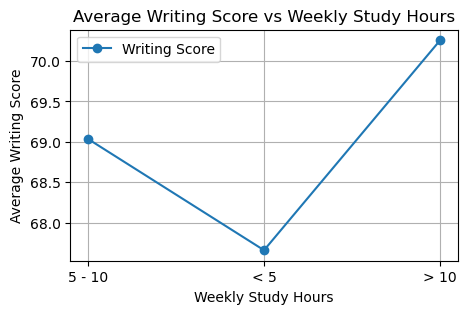

In [43]:

# Calculate the average test scores for each number of weekly study hours
avg_scores = df.groupby('WklyStudyHours')[['MathScore', 'ReadingScore', 'WritingScore']].mean()

# Plot the line plot for Math Score
plt.figure(figsize=(5, 3))
plt.plot(avg_scores.index, avg_scores['MathScore'], marker='o', label='Math Score')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Math Score')
plt.title('Average Math Score vs Weekly Study Hours')
plt.legend()
plt.grid(True)
plt.show()

# Plot the line plot for Reading Score
plt.figure(figsize=(5, 3))
plt.plot(avg_scores.index, avg_scores['ReadingScore'], marker='o', label='Reading Score')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Reading Score')
plt.title('Average Reading Score vs Weekly Study Hours')
plt.legend()
plt.grid(True)
plt.show()

# Plot the line plot for Writing Score
plt.figure(figsize=(5, 3))
plt.plot(avg_scores.index, avg_scores['WritingScore'], marker='o', label='Writing Score')
plt.xlabel('Weekly Study Hours')
plt.ylabel('Average Writing Score')
plt.title('Average Writing Score vs Weekly Study Hours')
plt.legend()
plt.grid(True)
plt.show()

### Ans: students who study more hours per week tend to achieve higher test scores

# **Q.14: Is there a correlation between the number of weekly study hours and test scores?**

In [44]:

# Replace 'WklyStudyHours' with the actual name of the column containing information about weekly study hours

# Define the mapping of categorical values to numerical values
hour_mapping = {'< 5': 0, '5 - 10': 1, '> 10': 2}

# Replace categorical values with numerical values
df['WklyStudyHours'] = df['WklyStudyHours'].replace(hour_mapping)

# Convert the column to integer type

df['WklyStudyHours'] = df['WklyStudyHours'].astype(int)

# Now 'WklyStudyHours' column contains numerical values with the specified mappings


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19129 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               19129 non-null  object
 1   EthnicGroup          19129 non-null  object
 2   ParentEduc           19129 non-null  object
 3   LunchType            19129 non-null  object
 4   TestPrep             19129 non-null  int32 
 5   ParentMaritalStatus  19129 non-null  object
 6   PracticeSport        19129 non-null  object
 7   IsFirstChild         19129 non-null  object
 8   NrSiblings           19129 non-null  int32 
 9   TransportMeans       19129 non-null  object
 10  WklyStudyHours       19129 non-null  int32 
 11  MathScore            19129 non-null  int64 
 12  ReadingScore         19129 non-null  int64 
 13  WritingScore         19129 non-null  int64 
dtypes: int32(3), int64(3), object(8)
memory usage: 2.0+ MB


In [46]:
# Calculate correlation coefficients
correlation_math = df['WklyStudyHours'].corr(df['MathScore'])
correlation_reading = df['WklyStudyHours'].corr(df['ReadingScore'])
correlation_writing = df['WklyStudyHours'].corr(df['WritingScore'])

print("Correlation between Weekly Study Hours and Math Score:", correlation_math)
print("Correlation between Weekly Study Hours and Reading Score:", correlation_reading)
print("Correlation between Weekly Study Hours and Writing Score:", correlation_writing)


Correlation between Weekly Study Hours and Math Score: 0.09521071628992904
Correlation between Weekly Study Hours and Reading Score: 0.04924594022056823
Correlation between Weekly Study Hours and Writing Score: 0.057596508241469176


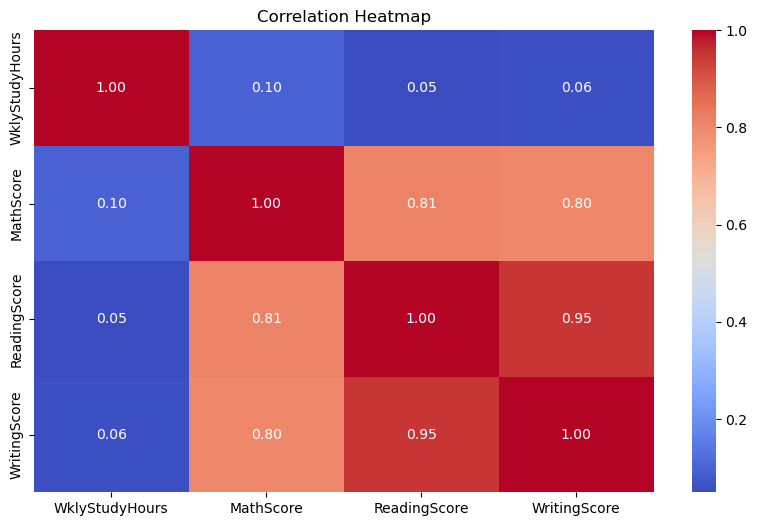

In [47]:
# Calculate the correlation matrix
correlation_matrix = df[['WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Weekly hour of study is not showing positive correlation with any of test score.